In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

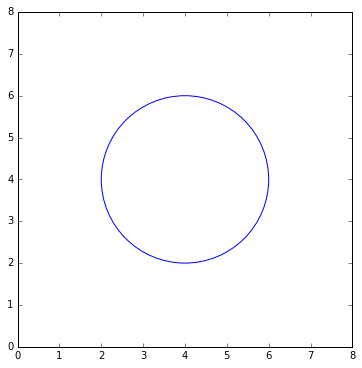

In [3]:
center = (4,4)
radius = 2

def plot_circle(center, radius):
    """ Function to plot a circle. """
    fig = plt.figure(figsize=(6,6))
    circle = plt.Circle(center, radius, fill=False, color='b')
    plt.ylim([0,8])
    plt.xlim([0,8])
    fgca = fig.gca()
    fgca.add_artist(circle)
    return fgca

plot_circle(center, radius)
plt.show()

<br>

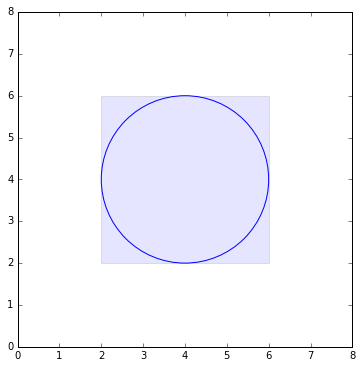

In [4]:
from matplotlib.patches import Rectangle

def plot_square(center, radius):
    """ Function to plot a square. """
    fgca = plot_circle(center, radius)
    fgca.add_patch(Rectangle((center[0] - radius, center[1] - radius), 
                             2*radius, 2*radius, alpha=0.1))
    return fgca
    
plot_square(center, radius)
plt.show()

<br>

<br>

In [6]:
import random

In [7]:
def gen_points(n, center, radius):
    """ 
    Function that generates 
    n x,y coordinates in a square of length radius*2.
    
    """
    x_coords = []
    y_coords = []
    for i in range(n):
        x_coords.append(random.random()*center[0]+radius)
        y_coords.append(random.random()*center[1]+radius)
    return x_coords, y_coords

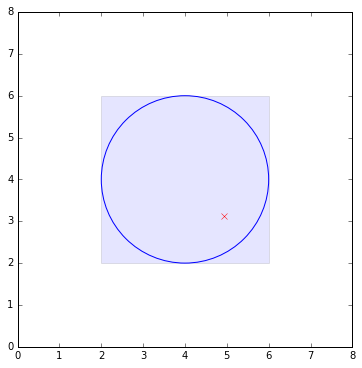

In [10]:
x, y = gen_points(1, center, radius)
fgca = plot_square(center, radius)
fgca.plot(x, y, linestyle="", marker="x", color="red")
plt.show()

<br>

<br>

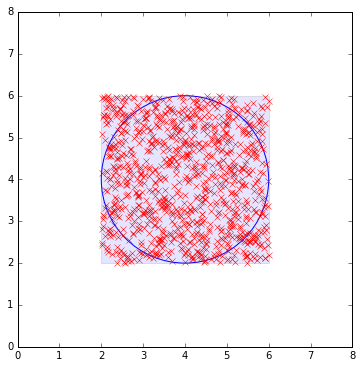

In [18]:
x, y = gen_points(1000, center, radius)
fgca = plot_square(center, radius)
fgca.plot(x, y, linestyle="", marker="x", color="red")
plt.show()

<br>

The plot above looks fine. In the last step, we only need to reject those points lie outside the circle, which is pretty straight forward using a Euclidean distance measure, that is 

\begin{equation} \sqrt{(x-y)^2} = |x-y|. \end{equation}



<br>

In [19]:
def reject(radius, center, x_coords, y_coords):
    """ Returns those coordinates that fall within the circle. """
    x_clean = []
    y_clean = []
    for x,y in zip(x_coords, y_coords):
        if ((x - center[0])**2 + (y-center[1])**2)**0.5 <= radius:
            x_clean.append(x)
            y_clean.append(y)
    return x_clean, y_clean

<br>

Again, let us do a quick visual check if we correctly removed all points that didn't satisfy the condition $|x-y| \le \text{radius}$.

<br>

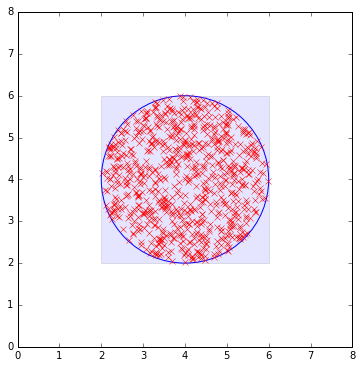

In [20]:
x_clean, y_clean = reject(radius, center, x, y)
fgca = plot_square(center, radius)
fgca.plot(x_clean, y_clean, linestyle="", marker="x", color="red")
plt.show()

<br>

\begin{equation} A_{\text{rectangle}} = (2 \times R)^2 \end{equation}



<br>

\begin{equation} \hat{A}_{\text{est_circle}} = A_{\text{rectangle}} \times \frac{\text{# points inside circle}}{\text{# all points}} \end{equation}

In [21]:
def estimate_circle_area(n, center, radius):
    """ Returns the estimated circle area via rejection sampling. """
    rect_area = (2*radius)**2
    x, y = gen_points(n, center, radius)
    x_clean, y_clean = reject(radius, center, x, y)
    est_circle_area = rect_area * (len(x_clean)/len(x))

    return est_circle_area

In [22]:
print('Estimated circle area:', estimate_circle_area(100000, center, radius))

Estimated circle area: 12.56176


<br>

Now, let's double-check how close we got using the more accurate equation:

\begin{equation} A_{\text{circle}} = \pi \times R^2 \end{equation}

In [23]:
from math import pi

print('Circle area using pi:', pi*radius**2)

Circle area using pi: 12.566370614359172


<br>

Who would have guessed what comes next: Let us use our rejection sampling method to estimate pi itself:

\begin{equation} \hat{\pi} = \frac{\hat{A}_{\text{est_circle}}}{R^2}  \end{equation}

<br>

In [24]:
def approximate_pi(n, center, radius):
    """ Returns an approximation of pi via rejection sampling. """
    circ_area = estimate_circle_area(n, center, radius)
    return circ_area/radius**2

for i in (10, 100, 10000, 10000000):
    pi_est = approximate_pi(i, center, radius)
    print('Pi estimate: %s (n=%s)' %(pi_est, i))

Pi estimate: 3.6 (n=10)
Pi estimate: 3.2 (n=100)
Pi estimate: 3.1588 (n=10000)


Pi estimate: 3.1412508 (n=10000000)
